In [1]:
import pandas as pd
import ta

# Feature Engineering for Stock Prediction

## What is Feature Engineering?

Feature engineering is the process of creating **new variables (features)** from raw data that help machine learning models make better predictions. 

For stock prediction, we transform basic OHLCV data into **technical indicators** that capture market patterns and trader psychology.

## Why Technical Indicators?

- **SMA (Simple Moving Average)**: Shows trend direction
- **RSI (Relative Strength Index)**: Identifies overbought/oversold conditions  
- **MACD**: Reveals momentum changes
- **Lag features**: Give the model "memory" of recent prices

These indicators help our model understand market sentiment and predict future price movements.

In [2]:
TICKER = input("Enter stock ticker (e.g. AAPL, TSLA, MSFT): ").upper()
df = pd.read_csv(f'../data/{TICKER.lower()}.csv', index_col=0, parse_dates=True) # use the dates from the first column as row labels

C:\Users\bhatt\AppData\Local\Temp\ipykernel_4808\2557883135.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/{TICKER.lower()}.csv', index_col=0, parse_dates=True) # use the dates from the first column as row labels


In [3]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') # convert column data to numeric format and if it can't convert something replace with NaN (Not a Number)

# Create technical indicators
df['SMA_20'] = ta.trend.SMAIndicator(df['Close'], window=20).sma_indicator()
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['MACD'] = ta.trend.MACD(df['Close']).macd()

## Creating Technical Indicators

Technical indicators transform raw price data into actionable trading signals:

### 1. **SMA_20 (20-Day Simple Moving Average)**
- **Purpose**: Smooths price data to show trend direction
- **Signal**: Price above SMA = uptrend, below SMA = downtrend
- **How it works**: Average of last 20 closing prices

### 2. **RSI (Relative Strength Index)**  
- **Purpose**: Measures if stock is overbought or oversold
- **Range**: 0-100
- **Signals**: RSI > 70 = overbought (sell signal), RSI < 30 = oversold (buy signal)

### 3. **MACD (Moving Average Convergence Divergence)**
- **Purpose**: Shows momentum changes and trend reversals
- **Signal**: MACD crossing above 0 = bullish, below 0 = bearish

In [4]:
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)
# create short "memory" of past prices

## Creating Lag Features (Price Memory)

Lag features give our model **"memory"** of recent price history:

- **Close_lag1**: Yesterday's closing price
- **Close_lag2**: Price from 2 days ago  
- **Close_lag3**: Price from 3 days ago

### Why This Matters:
- **Pattern Recognition**: Model can see if prices are trending up/down
- **Momentum**: Recent price changes often continue short-term
- **Support/Resistance**: Past prices influence future price levels

This helps the model understand: *"If the stock went up the last 3 days, it might continue up tomorrow"*

In [5]:
df = df.dropna() # drop missing value
df.head()


,Open,High,Low,Close,Volume,SMA_20,RSI,MACD,Close_lag1,Close_lag2,Close_lag3
Price,,,,,,,,,,,
2018-02-07,22.599333,23.066668,22.377333,23.000000,104538000.0,22.920900,54.966167,0.225902,22.264668,22.208668,22.916668
2018-02-08,22.887333,23.241333,20.973333,21.015333,154719000.0,22.855667,37.220443,0.064324,23.000000,22.264668,22.208668
2018-02-09,21.328667,21.398666,19.650667,20.694668,194005500.0,22.763900,35.240773,-0.088581,21.015333,23.000000,22.264668
2018-02-12,21.075333,21.205334,20.416668,21.048668,93417000.0,22.695600,39.092188,-0.179130,20.694668,21.015333,23.000000
2018-02-13,21.001333,21.612667,20.834000,21.577333,68403000.0,22.640933,44.409381,-0.205858,21.048668,20.694668,21.015333


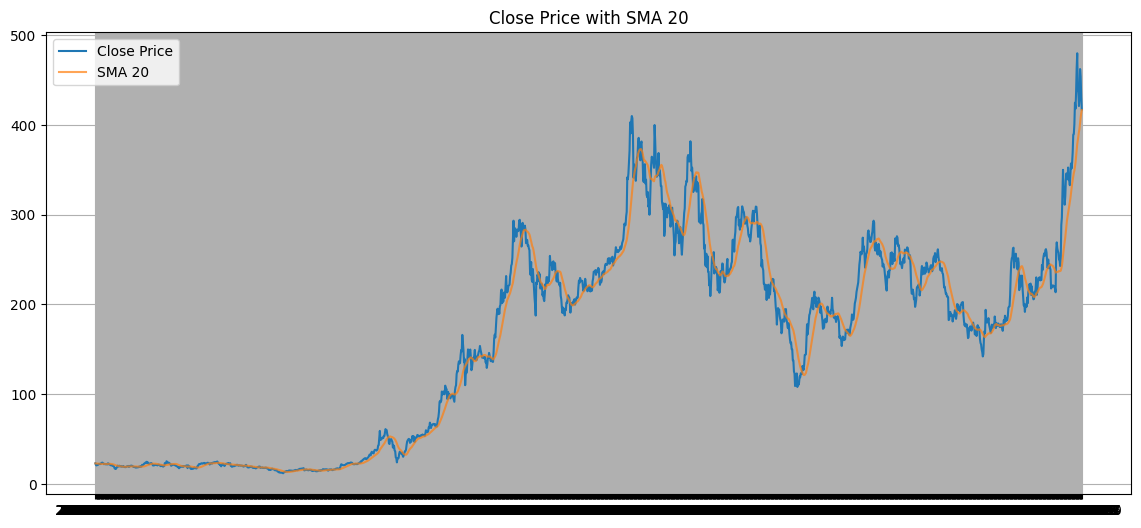

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20', alpha=0.7)
plt.title("Close Price with SMA 20")
plt.legend()
plt.grid()
plt.show()

## Visualizing Trend Analysis

This chart shows the relationship between **actual stock price** and the **20-day moving average**:

### What to Look For:

🟢 **Bullish Signals** (Buy opportunities):
- Price crosses **above** the SMA line
- Price stays consistently **above** SMA
- SMA line is **sloping upward**

🔴 **Bearish Signals** (Sell opportunities):  
- Price crosses **below** the SMA line
- Price stays consistently **below** SMA
- SMA line is **sloping downward**

### Trading Strategy:
Professional traders often use this simple rule: *"Buy when price breaks above SMA, sell when it breaks below"*

In [7]:
# Let's examine our engineered features
print("📊 TECHNICAL INDICATORS SUMMARY")
print("=" * 50)

# Show the data structure
print(f"Dataset shape: {df.shape[0]} trading days, {df.shape[1]} features")
print(f"\nFeatures created:")
print(f"- Original columns: Open, High, Low, Close, Volume")
print(f"- Technical indicators: SMA_20, RSI, MACD") 
print(f"- Lag features: Close_lag1, Close_lag2, Close_lag3")

print(f"\nSample of engineered features:")
print(df[['Close', 'SMA_20', 'RSI', 'MACD', 'Close_lag1']].tail())

📊 TECHNICAL INDICATORS SUMMARY
Dataset shape: 1735 trading days, 11 features

Features created:
- Original columns: Open, High, Low, Close, Volume
- Technical indicators: SMA_20, RSI, MACD
- Lag features: Close_lag1, Close_lag2, Close_lag3

Sample of engineered features:
                 Close      SMA_20        RSI       MACD  Close_lag1
Price                                                               
2024-12-23  430.600006  396.037001  62.731818  33.747408  421.059998
2024-12-24  462.279999  402.221501  68.422829  34.480358  430.600006
2024-12-26  454.130005  408.016501  65.645587  34.011526  462.279999
2024-12-27  431.660004  412.955000  58.585163  31.464133  454.130005
2024-12-30  417.410004  416.567500  54.576261  27.972995  431.660004


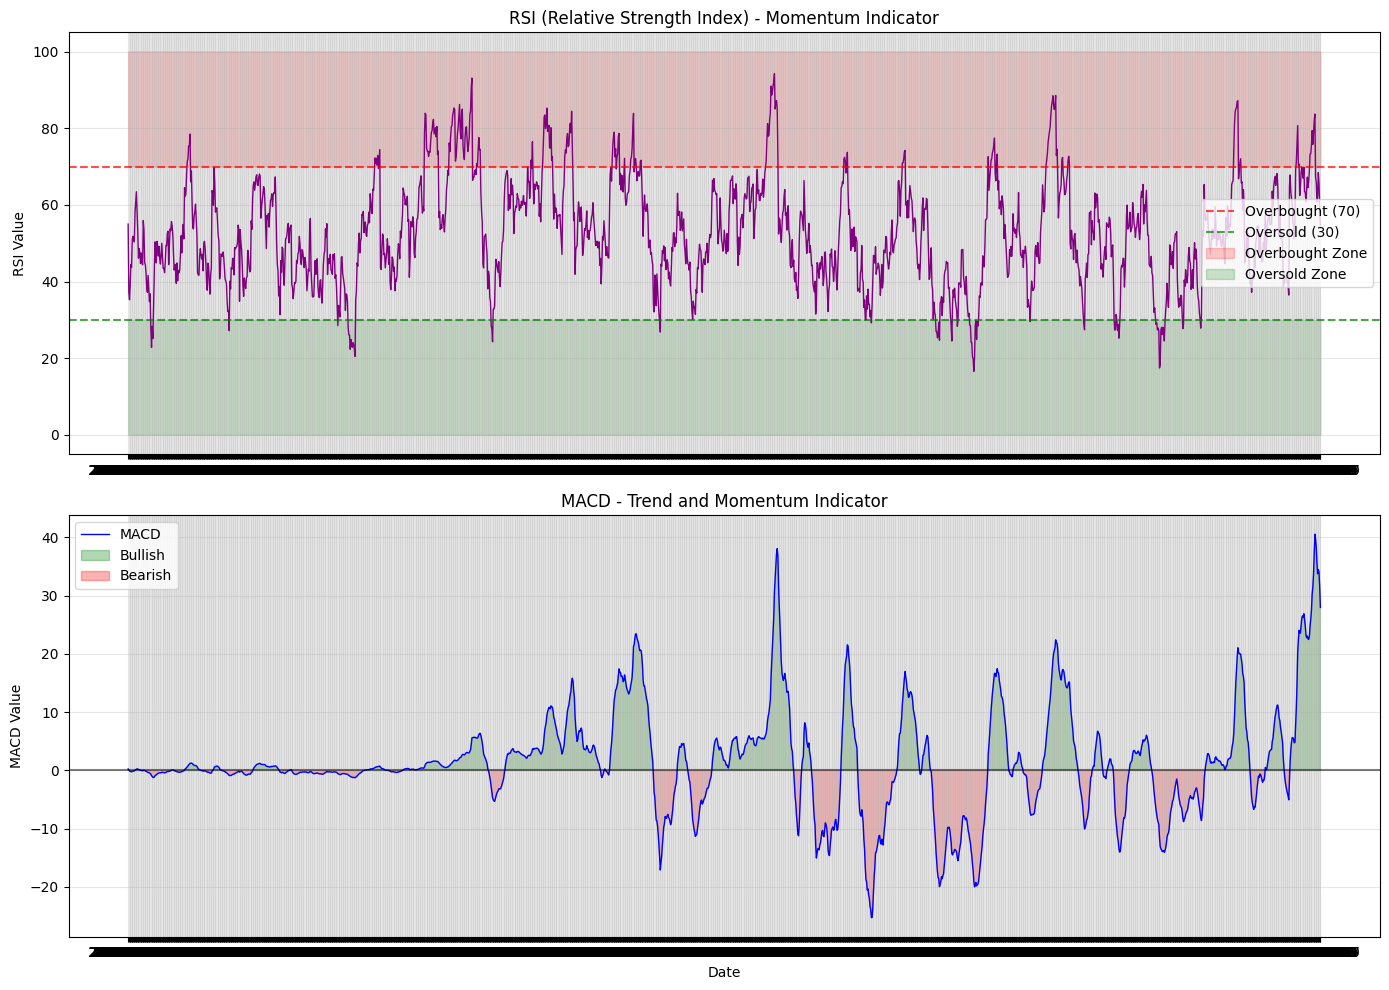

In [8]:
# Visualize RSI and MACD indicators
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# RSI Plot
ax1.plot(df.index, df['RSI'], color='purple', linewidth=1)
ax1.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax1.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax1.fill_between(df.index, 70, 100, alpha=0.2, color='red', label='Overbought Zone')
ax1.fill_between(df.index, 0, 30, alpha=0.2, color='green', label='Oversold Zone')
ax1.set_title('RSI (Relative Strength Index) - Momentum Indicator')
ax1.set_ylabel('RSI Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# MACD Plot  
ax2.plot(df.index, df['MACD'], color='blue', linewidth=1, label='MACD')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.fill_between(df.index, 0, df['MACD'], where=(df['MACD'] >= 0), 
                 alpha=0.3, color='green', label='Bullish')
ax2.fill_between(df.index, 0, df['MACD'], where=(df['MACD'] < 0), 
                 alpha=0.3, color='red', label='Bearish')
ax2.set_title('MACD - Trend and Momentum Indicator')
ax2.set_ylabel('MACD Value')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## How These Features Help Predict Stock Prices

### 🎯 **The Goal**: Predict Tomorrow's Price Movement

Our engineered features give the machine learning model different types of "intelligence":

### **Trend Intelligence (SMA_20)**:
- *"Is the stock in an uptrend or downtrend?"*
- Model learns: Price above SMA usually continues up

### **Momentum Intelligence (RSI)**:
- *"Is the stock overbought or oversold?"*
- Model learns: RSI > 70 often leads to price drops, RSI < 30 often leads to price rises

### **Change Detection (MACD)**:
- *"Is momentum shifting?"*
- Model learns: MACD crossing above 0 often signals continued upward movement

### **Memory Intelligence (Lag Features)**:
- *"What happened recently?"*
- Model learns: If price went up 3 days in a row, it might continue

### **🚀 Next Steps**:
These features will become **inputs** to our LSTM neural network, which will learn complex patterns and predict whether Apple's stock will go up or down tomorrow!